In [1]:
import numpy as np 
from similar_pairs import * 
from embedding_visualization import * 
from utils import *


## GloVe embeddings ## 
Word embeddings used here are pre-trained GloVe embeddings, which can be downloaded 
[here](https://nlp.stanford.edu/projects/glove/). 


In [2]:
# Load pre-trained on 6 billion tokens GloVe embeddings 
small_embeddings = load_word_vector(6)
# Load pre-trained on 840 billion tokens GloVe embeddings
large_embeddings = load_word_vector(840)


## Visualize word embeddings in reduced dimension ##
GloVe embeddings used in this example are high-dimensional, thus it is difficult to visualize them. To see the 
relationships between word vectors, it's important to perform dimensionality reduction by using algorithms such as t-SNE.
In this example, I use [scikit-learn's implementation of t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). 



In [13]:
# List of words to visualize
words = ['france', 'germany', 'spain', 'dog', 'cat', 'mother', 'father', 'sister', 'brother']


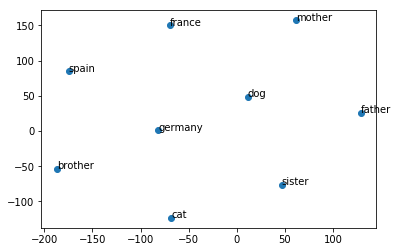

In [14]:
# Visualize chosen words using the smaller pre-trained embeddings.
visualize(words, small_embeddings)


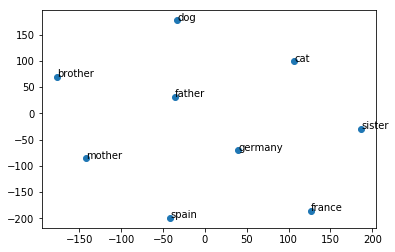

In [15]:
# Visualize chosen words using the larger pre-trained embeddings. 
visualize(words, large_embeddings)


It's observable that the larger GloVe embeddings are able to represent the relationships among the chosen words
better, as words with semantic and/or syntactic meanings are (likely) grouped together in the graph. More specifically, 
France, England, and Spain are in one group (countries); dog and cat are in one group (animals/pets); mother, 
father, brother, and sister are in one group (family members/people). 


## Complete analogies ## 
Since word embeddings are able to learn and represent relationships among words, it is possible that they can be used 
to finish analogies such as: "Man is to King as Woman is to ___", where the answer should be "Queen".


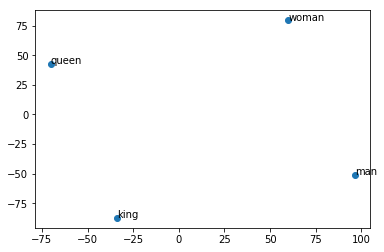

In [9]:
example = ["man", "king", "woman", "queen"]
visualize(example, large_embeddings)

For this task, the answer is given by the formula:  
E(Man) - E(King) $\approx$ E(Woman) - E(?)  $\Rightarrow$ E(?) = E(Woman) - E(Man) + E(King)  
If the embeddings are learned properly, the result of E(?) should be close to E(Queen). 

In [6]:
# Lists of inputs
input_1 = ["man", "king", "woman"]
input_2 = ["man", "waiter", "woman"]
input_3 = ["london", "england", "paris"]


In [16]:
# Outputs 
output_1 = finish_similar_pairs(input_1, large_embeddings)
output_2 = finish_similar_pairs(input_2, large_embeddings)
output_3 = finish_similar_pairs(input_3, large_embeddings)
print_sentence(input_1, output_1)
print_sentence(input_2, output_2)
print_sentence(input_3, output_3)



man is to king as woman is to queen
man is to waiter as woman is to waitress
london is to england as paris is to france
